<h1 align="center">Teoría Generalizada del Medio Efectivo de la Polarización Inducida: Tejido Epitelial de Cuello Uterino</h1>
<div align="right">Por David A. Miranda, PhD<br>2021</div>

Los modelos de este Jupyter Notebook fueron construidos con los datos reportados en la tabla 1 de [David A Miranda et al 2013 J. Phys.: Conf. Ser. 434 012056](https://iopscience.iop.org/article/10.1088/1742-6596/434/1/012056/pdf).

# 1. Importa las librerias

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# 2. Detalles teóricos
La Teoría Generalizada del Medio Efectivo de la Polarización Inducida, GEMTIP, fue formulada por el profesor [Zhadanov en 2008](http://www.cemi.utah.edu/PDF_70_10/2008b.pdf).  En esta teória se modela las propiedades eléctricas de un medio heterogéneo por medio de uno homogéneo efectivo, de manera análoga a como un cuando de un circuito eléctrico complejo, constituido por muchos elementos, se obtiene el circuito equivalente.

Para el caso de inclusiones esféricas, la conductividad eléctrica efectiva $\sigma_e$ está dada por:

$$\sigma_e = \sigma_0 \left\{ 1 + \sum_{l=1}^N f_l M_l \left[ 1 - \frac{1}{1 + (j\omega\tau_l)^{c_l}} \right] \right\}$$

Donde $\sigma_0 = 1/\rho_0$ es la conductividad eléctrica del medio soporte; $f_l$, la fracción de volumen que ocupan las inclusiones $l$-ésimas; $M_l = 3 \frac{\rho_0 - \rho_l}{2\rho_l + \rho_0}$, la polarizabilidad de las inclusiones $l$-ésimas; $\rho_l = 1/\sigma_l$, la resistividad eléctrica de las inclusiones $l$-ésimas; $\omega$, la frecuencia angular de la perturbación externa; $\tau_l$, el tiempo de relajación de las inclusiones $l$-ésimas y $c_l$, el parámetro de relajación de las inclusiones $l$-ésimas.

# 3. El modelo
El siguiente método implementa el modelo GEMTIP para describir la conductividad eléctrica de inclusiones esféricas.

In [2]:
def gemtip_sh(params, w):
    params_keys = ['rho_0','rho_l', 'M_l', 'tau_l', 'c_l']
    sigma_e = np.array([])
    # Verificación de parámetros #
    if type(params) != type({}):
        print('Error! The params must be a dictionary.')
        return sigma_e
    this_keys = params.keys()
    for key in params_keys:
        if not key in this_keys:
            print('Error! The parameter %s information was omited in params.' % key)
            return sigma_e
    N = [ len(params[key]) for key in params_keys[1:] ]
    if np.std(N) != 0:
        print('Error in the number of parameters *_l, please, review.')
        return sigma_e
    rho_0 = params['rho_0']
    rho_l = np.array(params['rho_l'])
    f_l_M_l   = np.array(params['M_l'])
    tau_l = np.array(params['tau_l'])
    c_l   = np.array(params['c_l'])
    M_l   = 3 * (rho_0 - rho_l) / (2 * rho_l + rho_0)
    f_l = f_l_M_l / M_l
    if np.sum(f_l) >= 1:
        print('Error! The sum of all f_l must be less than one: sum(f_l) = %0.2f' % sum(f_l))
        return sigma_e
    #############################
    w = w.reshape(len(w), 1)
    sum_elements = 0
    for fl, Ml, Tl, cl in zip(f_l, M_l, tau_l, c_l):
        sum_elements += fl*Ml * (1 - 1 / ( 1 + (1j * w * Tl) ** cl ))
    sigma_e = (1 + sum_elements)/rho_0 
    return sigma_e

In [3]:
def plot(f, rho):
    if len(f) != len(rho):
        print('Error! The frequency and resistivity vectors have different sizes.')
        return None
    fig, ax1 = plt.subplots(dpi = 120)
    color = 'k'
    ax1.set_xlabel('Frecuencia [Hz]')
    ax1.set_ylabel(r'$real\{\rho_e\}$ $[\Omega m]$', color=color)
    ax1.semilogx(f, rho.real, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(r'$-imag\{\rho_e\}$ $[\Omega m]$', color=color)  # we already handled the x-label with ax1
    ax2.semilogx(f, -rho.imag, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()

# 4. Propiedades Eléctricas del Tejido Epitelial Estratificado

In [4]:
f = np.logspace(2, 7, 2000)
w = 2 * np.pi * f

## 4.1. Tejido Normal (NO)

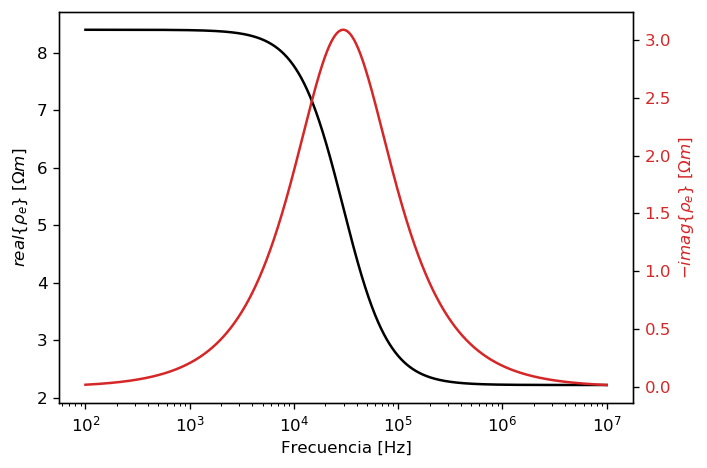

In [5]:
params_NO = {
    'rho_0' : 8.4,
    'rho_l' : [
        0.05,
        0.08,
        0.11,
    ],
    'M_l'   : [
        0.289,
        1.400,
        1.094,
    ],
    'tau_l' : [
        1.18E-6,
        1.40E-6,
        1.50E-6,
    ],
    'c_l' : [
        0.999,
        1.000,
        1.000,
    ],
}
plot(f, 1/gemtip_sh(params_NO, w))

## 4.2. Tejido con displacia de bajo grado (LSIL)

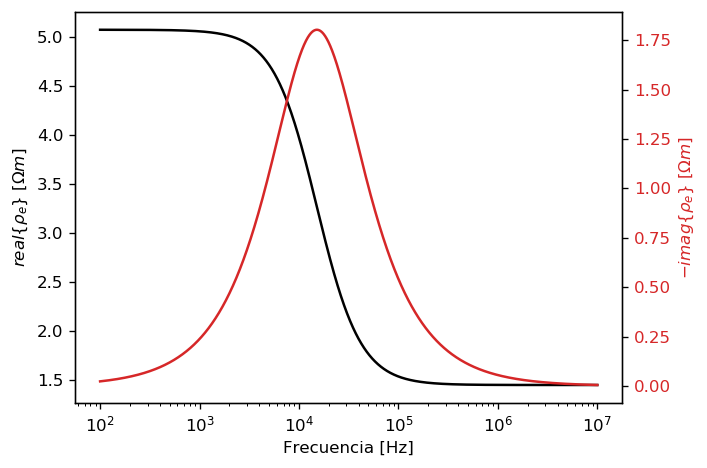

In [6]:
params_LSIL = {
    'rho_0' : 5.08,
    'rho_l' : [
        0.03,
        0.01,
        4.84,
    ],
    'M_l'   : [
        1.094,
        1.400,
        0.001,
    ],
    'tau_l' : [
        2.63E-06,
        3.29E-06,
        0.671036,
    ],
    'c_l' : [
        0.999,
        0.999,
        0.998,
    ],
}
plot(f, 1/gemtip_sh(params_LSIL, w))

## 4.3. Tejido con displacia de alto grado (HSIL)

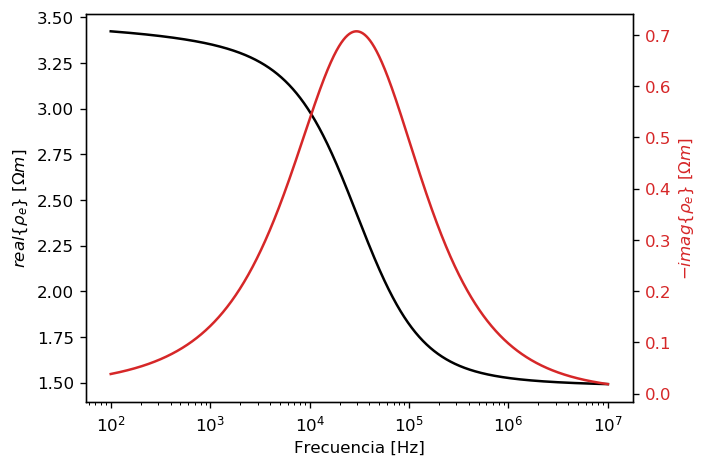

In [7]:
params_HSIL = {
    'rho_0' : 3.49,
    'rho_l' : [
        0.22,
        2.33,
    ],
    'M_l'   : [
        1.247,
        0.119,
    ],
    'tau_l' : [
        2.01e-6,
        3.46e-6,
    ],
    'c_l' : [
        0.834,
        0.269,
    ],
}
plot(f, 1/gemtip_sh(params_HSIL, w))

## 4.4. Tejido cancerígeno (CA)

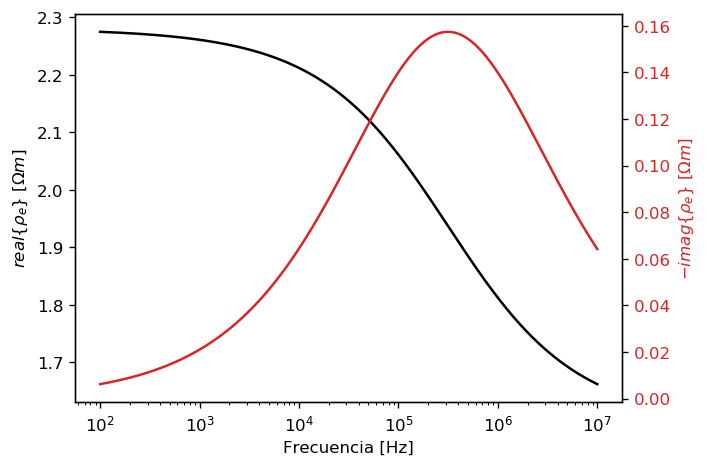

In [8]:
params_CA = {
    'rho_0' : 2.28,
    'rho_l' : [
        1.38,
    ],
    'M_l'   : [
        0.430,
    ],
    'tau_l' : [
        2.63e-7,
    ],
    'c_l' : [
        0.548,
    ],
}
plot(f, 1/gemtip_sh(params_CA, w))

# 5. Pregunas de autoexplicación
Resuleva las siguientes preguntas de autoexplicación:
+ ¿Cómo se relacionan los parámetros de entrada de este modelo con los estudiados la semana anterior?
+ ¿Cómo se cálcula la fracción de volumen? Explique.
+ Para cada estadío del tejido epitelial de cuello uterino, ¿cómo interpretaría cada parámetro del modelo GEMTIP?
+ De acuerdo a los estudiado hasta ahora, ¿cómo se podría relacionar los valores de los parámetros de GEMTIP con cada estado del tejido?
+ Reproduzca la figura 1 del artículo [David A Miranda et al 2013 J. Phys.: Conf. Ser. 434 012056](https://iopscience.iop.org/article/10.1088/1742-6596/434/1/012056/pdf).
+ ¿Qué diferencia observa entre los espectros de impedancia eléctrica para los diferentes estadíos del tejido de cuello uterino?


End